<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/master/template%20Series%20temporales/ARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo autoregresivo de medias móviles

$$ X_{t} = \varphi_{1} X_{t-1}+\vartheta_{1}\varepsilon_{t-1} + \varepsilon_{t} + C$$

Considera para la predicción tanto el valor de periodos anteriores, como los errores o residuos de periodos pasados.

ARMA(P, Q)

## Importación y formateo de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

#Prueba Logverosimilitud
# requiere que los modelos esten anidados
# p1 + q1 > p2 +q2
# p1 >= p2
# q1 >= q2
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

# carga de archivo
raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/cccg8105/curso-series-temporales/master/7.%20ARMA%20autorregresivos%20de%20medias%20moviles/Python/Index2018.csv")
dateColumnName = "date"
analizedValue = "ftse"
unused_columns = ['spx','dax','ftse','nikkei']

# paso 1 buscar modelos con coeficientes significativos
# paso 2 comparar AIC y LL
# paso 3 realizar LLR test en caso se pueda
# paso 4 evaluar residuos

nroRetrasos = 40
ratioConfianza = 0.95

# Formateo de dataset
df_comp=raw_csv_data.copy()
print(raw_csv_data.head(5))
df_comp.date = pd.to_datetime(df_comp[dateColumnName], dayfirst = True)
df_comp.set_index(dateColumnName, inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp['analizedValue']=df_comp[analizedValue]

df_comp = df_comp.drop(unused_columns, axis=1)
# data frame para analizar
df_comp.head(5)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         date     spx      dax     ftse    nikkei
0  07/01/1994  469.90  2224.95  3445.98  18124.01
1  10/01/1994  475.27  2225.00  3440.58  18443.44
2  11/01/1994  474.13  2228.10  3413.77  18485.25
3  12/01/1994  474.17  2182.06  3372.02  18793.88
4  13/01/1994  472.47  2142.37  3360.01  18577.26


,analizedValue
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


### Separación datos de entrenamiento y prueba

In [ ]:
porcentajeEntrenamiento = 0.8
size = int(len(df_comp)*porcentajeEntrenamiento)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Serie temporal

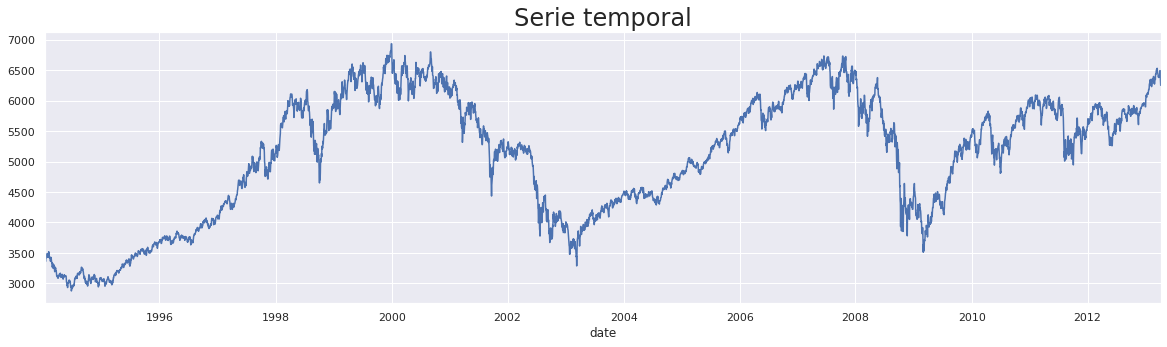

In [ ]:
df.analizedValue.plot(figsize = (20,5))
plt.title("Serie temporal", size= 24)
plt.show()

## ARMA(1, 1) de retornos

In [ ]:
df['returns'] = df.analizedValue.pct_change(1)*100
model_ret_ar_1_ma_1 = ARMA(df.returns[1:], order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Sat, 14 Nov 2020   AIC                          15841.000
Time:                        11:36:23   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# Modelo autoregresivo
model_ret_ar_1 = ARMA(df.returns[1:], order = (1,0))
# Modelo de medias móviles 
model_ret_ma_1 = ARMA(df.returns[1:], order = (0,1))

results_ret_ar_1 = model_ret_ar_1.fit()
results_ret_ma_1 = model_ret_ma_1.fit()

### Comparación de modelos

In [ ]:
if LLR_test(results_ret_ar_1, results_ret_ar_1_ma_1) < 1-ratioConfianza:
  print("ARMA es mejor predictor que AR")
else:
  print("AR es mejor predictor que ARMA")

if LLR_test(results_ret_ma_1, results_ret_ar_1_ma_1) < 1-ratioConfianza:
  print("ARMA es mejor predictor que MA")
else:
  print("MA es mejor predictor que ARMA")

print(results_ret_ar_1_ma_1.summary())
#print(results_ret_ar_1_ma_1.arparams)
#print(results_ret_ar_1_ma_1.arfreq)
#print(results_ret_ar_1_ma_1.arroots)

results_ret_ar_1_ma_1.pvalues.values[results_ret_ar_1_ma_1.pvalues.values<0.05]
#type(results_ret_ar_1_ma_1.pvalues)

ARMA es mejor predictor que AR
ARMA es mejor predictor que MA
                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Fri, 13 Nov 2020   AIC                          15841.000
Time:                        21:09:49   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000   

array([1.70874310e-29, 2.73482484e-40])

## ARMA(p,q) de retornos

Se emplean los retornos cuando la serie es no estacionaria

### Determinación de componentes MA

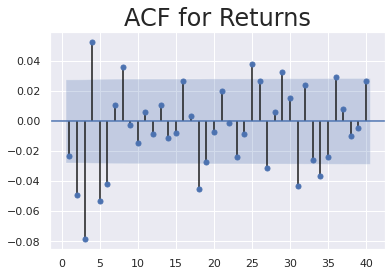

In [ ]:

sgt.plot_acf(df.returns[1:], zero = False, lags = nroRetrasos, alpha=.05)
plt.title("ACF for Returns",size=24)
plt.show()

In [ ]:
retrasosSignificativosACF = [2, 3, 4, 5, 6]

### Determinación de componentes AR

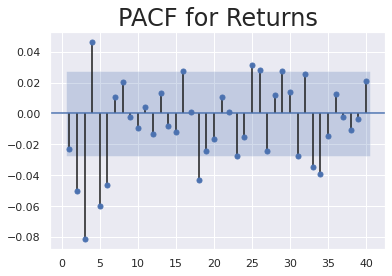

In [ ]:
sgt.plot_pacf(df.returns[1:], zero = False, lags = nroRetrasos, method='ols')
plt.title("PACF for Returns",size=24)
plt.show()

In [ ]:
retrasosSignificativosPACF = [2, 3, 4, 5, 6, 16]

### Evaluación de posibles modelos

In [ ]:
bestModels = []

for p in retrasosSignificativosPACF:
  for q in retrasosSignificativosACF:
    try:
      print("\n ARMA(", p,",", q, ") \tLL =", result.llf, "\tAIC = ", result.aic)
      model = ARMA(df.returns[1:], order=(p,q))
      result = model.fit()
      if len(result.pvalues.values[result.pvalues.values<=(1-ratioConfianza)]) >= (p + q -2):
        candidateModel = [p, q, result.aic, result.llf,
                          len(result.pvalues.values[result.pvalues.values<=(1-ratioConfianza)]), result]
        bestModels.append(candidateModel)
    except:
      print("El modelo no es estacionario")      



 ARMA( 2 , 2 ) 	LL = -7884.833163160759 	AIC =  15791.666326321518

 ARMA( 2 , 3 ) 	LL = -7913.222797825467 	AIC =  15838.445595650934

 ARMA( 2 , 4 ) 	LL = -7895.587234020901 	AIC =  15805.174468041801

 ARMA( 2 , 5 ) 	LL = -7895.5599898427845 	AIC =  15807.119979685569

 ARMA( 2 , 6 ) 	LL = -7884.687596698319 	AIC =  15787.375193396638

 ARMA( 2 , 8 ) 	LL = -7884.364903532705 	AIC =  15788.72980706541

 ARMA( 3 , 2 ) 	LL = -7885.191126517409 	AIC =  15794.382253034819

 ARMA( 3 , 3 ) 	LL = -7895.7474585145965 	AIC =  15805.494917029193

 ARMA( 3 , 4 ) 	LL = -7893.51475991734 	AIC =  15803.02951983468

 ARMA( 3 , 5 ) 	LL = -7891.864889469945 	AIC =  15801.72977893989

 ARMA( 3 , 6 ) 	LL = -7883.904822122953 	AIC =  15787.809644245906

 ARMA( 3 , 8 ) 	LL = -7884.054318836605 	AIC =  15790.10863767321

 ARMA( 4 , 2 ) 	LL = -7882.273738100952 	AIC =  15790.547476201904

 ARMA( 4 , 3 ) 	LL = -7895.746567004586 	AIC =  15807.493134009172

 ARMA( 4 , 4 ) 	LL = -7891.279262224194 	AIC =  15

In [ ]:
import sys

min = sys.float_info.max
max = sys.float_info.max*(-1)
print(bestModels[-1])
bestModel = []

# comparacion de modelos con misma cantidad de varibales significativas
for model1 in bestModels:
  for model2 in bestModels:
    if model1[0] == model2[0] and model1[1] == model2[1]:
      continue
    if model1[0] + model1[1] == model2[0] + model2[1]:
      if model1[2] > model2[2]:
        bestModel = model1

bestModel
# LLF: Log verosimilitud debe ser mayor
# AIC: Criterio de informacion debe ser menor


[6, 3, 15791.666326321518, -7884.833163160759, 9, <statsmodels.tsa.arima_model.ARMAResultsWrapper object at 0x7fc228d587b8>]


[6,
 3,
 15791.666326321518,
 -7884.833163160759,
 9,

### Analisis de residuos

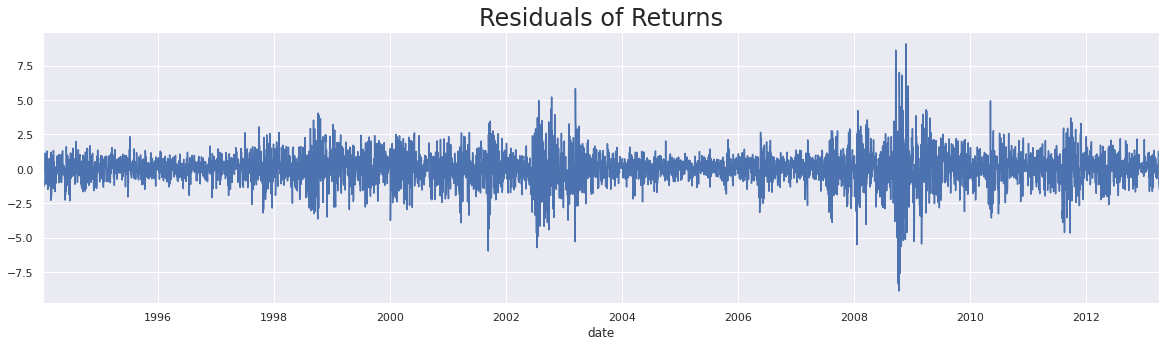

In [ ]:
df['bestModelResid'] = bestModel[5].resid[1:]
df.bestModelResid.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

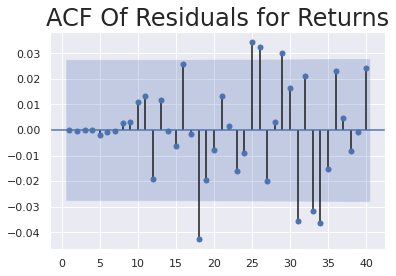

In [ ]:
sgt.plot_acf(df.bestModelResid[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

## ARMA de serie no estacionaria

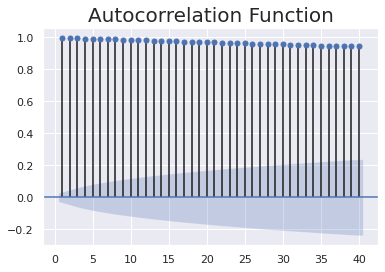

In [ ]:
sgt.plot_acf(df.analizedValue, unbiased=True, zero = False, lags = nroRetrasos)
plt.title("Autocorrelation Function",size=20)
plt.show()

In [ ]:
retrasosSignificativosACF = [2, 3, 4, 5, 6]

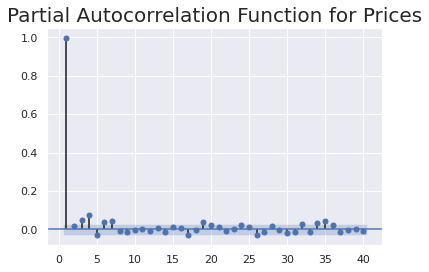

In [ ]:
sgt.plot_pacf(df.analizedValue, lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("Partial Autocorrelation Function for Prices",size=20)
plt.show()

In [ ]:
retrasosSignificativosPACF = [3, 4, 5, 6, 7]

### Evaluación de posibles modelos

In [ ]:
bestModels = []

for p in retrasosSignificativosPACF:
  for q in retrasosSignificativosACF:
    modelError = True
    findModel = True
    nlag = 0
    model = ARMA(df.analizedValue, order=(p,q))
    while modelError:
      try:
        if nlag == 0:
          result = model.fit()
          print("\n ARMA(", p,",", q, ") con 0 retrasos de ajuste")
        else:
          result = model.fit(star_ar_lags = p + nlag - 1)
          print("\n ARMA(", p,",", q, ") con ", p + nlag - 1," retrasos de ajuste")
        modelError = False        
      except:
        if nlag > 0: 
          print("Falló modelo con nlag: ", p + nlag - 1)
        else:
          print("Falló modelo sin nlag ")
        nlag += 1 
        if nlag + p > p + q + 1:
          print("Modelo ARMA(", p,",", q, ") no estacionario")
          modelError = False
          findModel = False
    if len(result.pvalues.values[result.pvalues.values<=(1-ratioConfianza)]) == (p + q) and findModel:
      candidateModel = [p, q, result.aic, result.llf, 
                        len(result.pvalues.values[result.pvalues.values<=(1-ratioConfianza)]), 
                        p + nlag, result]
      bestModels.append(candidateModel)


 ARMA( 3 , 2 ) con 0 retrasos de ajuste
Falló modelo sin nlag 
Falló modelo con nlag:  3
Falló modelo con nlag:  4
Falló modelo con nlag:  5
Falló modelo con nlag:  6
Modelo ARMA( 3 , 3 ) no estacionario
Falló modelo sin nlag 
Falló modelo con nlag:  3
Falló modelo con nlag:  4
Falló modelo con nlag:  5
Falló modelo con nlag:  6
Falló modelo con nlag:  7
Modelo ARMA( 3 , 4 ) no estacionario
Falló modelo sin nlag 
Falló modelo con nlag:  3
Falló modelo con nlag:  4
Falló modelo con nlag:  5
Falló modelo con nlag:  6
Falló modelo con nlag:  7
Falló modelo con nlag:  8
Modelo ARMA( 3 , 5 ) no estacionario
Falló modelo sin nlag 
Falló modelo con nlag:  3
Falló modelo con nlag:  4
Falló modelo con nlag:  5
Falló modelo con nlag:  6
Falló modelo con nlag:  7
Falló modelo con nlag:  8
Falló modelo con nlag:  9
Modelo ARMA( 3 , 6 ) no estacionario
Falló modelo sin nlag 
Falló modelo con nlag:  4
Falló modelo con nlag:  5
Falló modelo con nlag:  6
Modelo ARMA( 4 , 2 ) no estacionario

 ARMA( 4

In [ ]:
bestModels

[[3,
  2,
  55236.220070478405,
  -27611.110035239202,
  5,
  3,

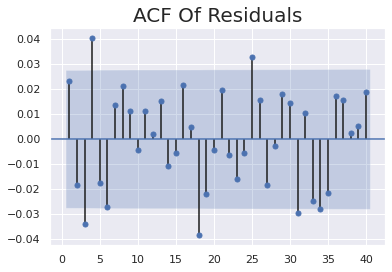

In [ ]:
df['bestModelValue'] = bestModels[0][6].resid
sgt.plot_acf(df.bestModelValue, zero = False, lags = 40)
plt.title("ACF Of Residuals",size=20)
plt.show()

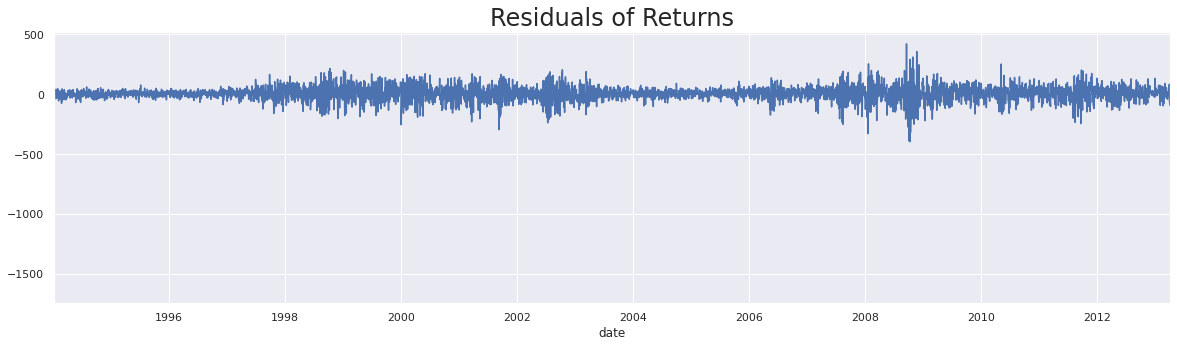

In [ ]:
df.bestModelValue.plot(figsize = (20,5))
plt.title("Residuals of Returns", size=24)
plt.show()